In [55]:
import pandas as pd
import numpy as np

In [56]:
df = pd.read_excel('df_clean_30_countries_T.xlsx', sheet_name='K_JOB')

In [57]:
df.columns

Index(['country', 'YEAR', '3_DAY_RETURN', 'EBITDA/ SALES ', 'P/E TARGET',
       'LOG_DEALVALUE', 'SPOTPRICE1', 'REGION_Africa', 'REGION_Asia',
       'REGION_Europe', 'REGION_North America', 'REGION_Oceania',
       'REGION_South America', 'resource_rent', 'PoliticalRisk',
       'econonomic_growth', 'DEVELOPMENT', 'law_index'],
      dtype='object')

In [58]:
df

,country,YEAR,3_DAY_RETURN,EBITDA/ SALES,P/E TARGET,LOG_DEALVALUE,SPOTPRICE1,REGION_Africa,REGION_Asia,REGION_Europe,REGION_North America,REGION_Oceania,REGION_South America,resource_rent,PoliticalRisk,econonomic_growth,DEVELOPMENT,law_index
0,Canada,2022,5.236146,0.243945,7.870370,1.223079,99.876229,0,0,0,1,0,0,1.495781,0.898674,1,0,1.627133
1,United States,2013,0.782876,0.859955,9.411168,1.583199,86.045140,0,0,0,1,0,0,0.862395,0.830177,0,0,1.620342
2,Australia,2016,-6.466637,0.421810,13.014006,0.248004,54.319229,0,0,0,0,1,0,3.275623,0.898359,1,0,1.818711
3,Australia,2012,1.870289,0.257546,7.639836,2.436239,102.246201,0,0,0,0,1,0,8.675038,0.883838,1,0,1.733154
4,United States,2018,5.069166,0.774344,25.556680,3.095232,70.906374,0,0,0,1,0,0,0.441880,0.867424,1,0,1.638507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,Caribbean,2015,6.678383,0.157288,10.827869,3.162599,65.764659,0,0,0,0,0,1,0.018000,0.820076,0,0,0.586510
674,Caribbean,2016,97.368421,0.084673,0.666667,0.314215,61.659054,0,0,0,0,0,1,0.001700,0.804293,0,0,0.812593
675,Caribbean,2017,2.553822,0.710975,65.193380,5.005572,145.034263,0,0,0,0,0,2,0.017000,0.785354,0,0,1.581930
676,Caribbean,2018,15.136855,1.510985,100.575820,4.931807,298.112694,0,0,0,0,0,4,0.013000,0.783460,1,0,2.315378


Adding 5 day and cmba


In [59]:
df_other = pd.read_excel('df_clean_30_countries_T.xlsx', sheet_name='Other columns')

In [60]:
df_other['country'] = df_other['country'].str.strip()

In [61]:
df_other.loc[df_other['country'].str.startswith('Cayman'), 'country'] = 'Caribbean'

In [62]:
final_df = pd.merge(df, df_other, on=['YEAR','country'], how="left")
final_df = final_df.fillna(0)

In [63]:
df= final_df.copy()

Correlation

In [64]:
# Assuming df is your DataFrame
correlation_matrix = df.corr()
correlation_matrix
# Compute the correlation matrix
corr = df.corr()

correlation_matrix

,YEAR,3_DAY_RETURN,EBITDA/ SALES,P/E TARGET,LOG_DEALVALUE,SPOTPRICE1,REGION_Africa,REGION_Asia,REGION_Europe,REGION_North America,REGION_Oceania,REGION_South America,resource_rent,PoliticalRisk,econonomic_growth,DEVELOPMENT,law_index,CBMA1,5_DAY_RETURN
YEAR,1.000000,-0.012165,0.067095,-0.073648,0.044196,0.359248,0.025247,-0.075106,0.005082,-0.036671,0.070100,-0.001375,-0.128336,0.032883,0.131810,-0.018435,-0.030674,-0.026618,-0.026836
3_DAY_RETURN,-0.012165,1.000000,-0.043524,-0.043557,-0.039197,0.030689,-0.030463,0.026014,0.011315,-0.043566,0.030359,0.063394,0.005851,-0.029976,-0.012997,-0.029898,-0.022120,0.015743,0.047350
EBITDA/ SALES,0.067095,-0.043524,1.000000,-0.048145,0.273831,0.082803,-0.055893,-0.061440,-0.060086,0.134269,-0.097219,0.048255,-0.097168,0.044575,-0.005608,-0.027496,0.049173,-0.004404,-0.006044
P/E TARGET,-0.073648,-0.043557,-0.048145,1.000000,0.046022,-0.061729,-0.030079,0.020814,-0.005593,0.027138,-0.034130,0.031275,-0.026350,0.008752,0.022125,-0.046965,0.020683,-0.017930,0.002295
LOG_DEALVALUE,0.044196,-0.039197,0.273831,0.046022,1.000000,0.108412,-0.039304,-0.034255,-0.010293,0.196985,-0.190086,0.030410,-0.167438,-0.014785,0.041275,-0.053673,-0.001506,0.008685,0.020776
SPOTPRICE1,0.359248,0.030689,0.082803,-0.061729,0.108412,1.000000,-0.006448,0.020655,-0.039191,-0.014573,0.012048,0.160572,0.121764,-0.015408,0.223423,-0.023942,-0.087250,0.086241,0.059068
REGION_Africa,0.025247,-0.030463,-0.055893,-0.030079,-0.039304,-0.006448,1.000000,-0.013659,-0.008696,-0.170266,-0.033848,-0.006158,0.100789,-0.393129,-0.033776,0.459438,-0.328016,0.045671,0.003355
REGION_Asia,-0.075106,0.026014,-0.061440,0.020814,-0.034255,0.020655,-0.013659,1.000000,-0.017133,-0.335450,-0.066685,-0.012131,0.494859,-0.726207,-0.126961,0.521672,-0.792000,0.044314,0.015171
REGION_Europe,0.005082,0.011315,-0.060086,-0.005593,-0.010293,-0.039191,-0.008696,-0.017133,1.000000,-0.213571,-0.042456,-0.007724,-0.046149,-0.013756,-0.047406,-0.015335,0.019646,0.120074,0.011488
REGION_North America,-0.036671,-0.043566,0.134269,0.027138,0.196985,-0.014573,-0.170266,-0.335450,-0.213571,1.000000,-0.831267,-0.151226,-0.777294,0.354738,0.070561,-0.300256,0.328076,-0.087259,-0.040086


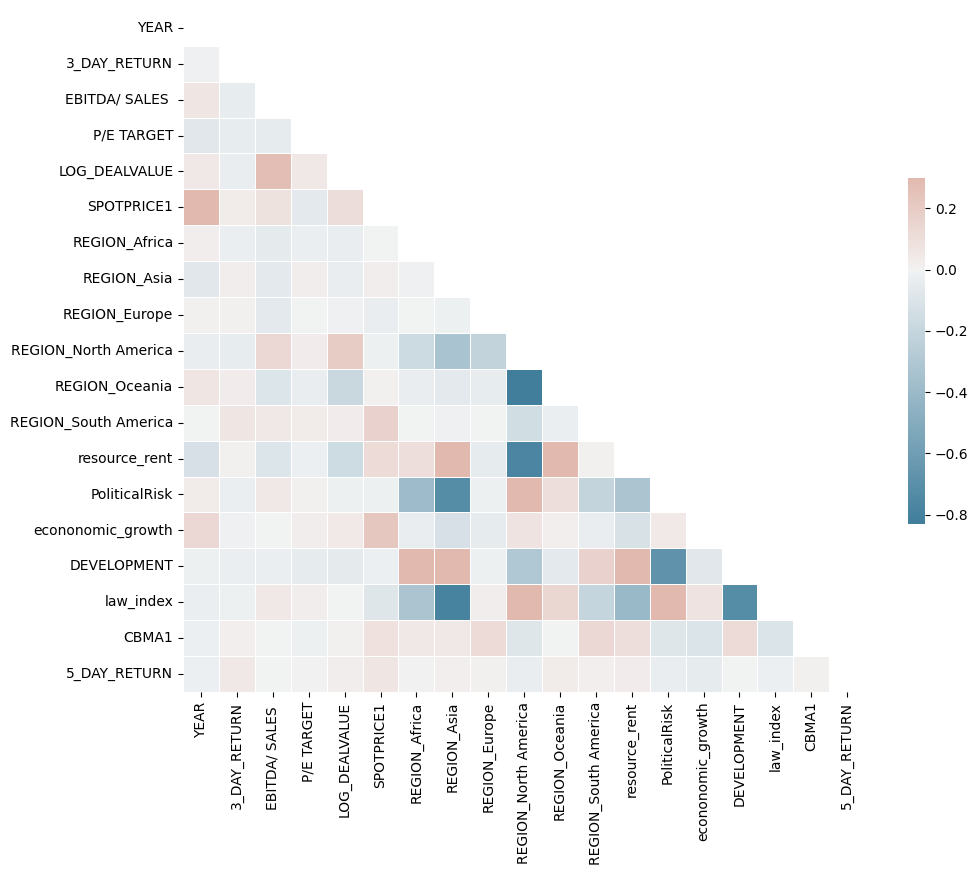

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

Multicollinearity

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import numpy as np

# We first need to add a constant (intercept) to our DataFrame
df_with_constant = add_constant(df.select_dtypes(include=[np.number]))

# Exclude 'CMBA1' from the independent variables
features = list(df_with_constant.columns)
features.remove('CBMA1')

# Calculate VIF for all independent variables
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_with_constant[features].values, i) for i in range(df_with_constant[features].shape[1])]
vif["features"] = df_with_constant[features].columns

print(vif)

       VIF Factor              features
0   499289.171088                 const
1        1.661251                  YEAR
2        1.021257          3_DAY_RETURN
3        1.116092        EBITDA/ SALES 
4        1.029388            P/E TARGET
5        1.160480         LOG_DEALVALUE
6        1.734422            SPOTPRICE1
7        6.461099         REGION_Africa
8       18.482610           REGION_Asia
9       12.659017         REGION_Europe
10     168.753488  REGION_North America
11     138.226343        REGION_Oceania
12       5.635503  REGION_South America
13       7.186733         resource_rent
14      14.047630         PoliticalRisk
15       1.154927     econonomic_growth
16       3.228089           DEVELOPMENT
17      24.491322             law_index
18       1.018391          5_DAY_RETURN


So in the regression one should exclude one region (oceania or north america) and potentuially political risk or development


In [67]:
df = df.rename(columns={
    '5_DAY_RETURN': 'Return5',
    '3_DAY_RETURN': 'Return3', 
    'EBITDA/ SALES ': 'EBITDAoverSALES',
    'P/E TARGET': 'PETARGET',
    'LOG_DEALVALUE': 'LOGDEALVALUE',
    'REGION_Africa': 'Africa',
    'REGION_Asia': 'Asia',
    'REGION_Europe': 'Europe',
    'REGION_South America': 'SouthAmerica',      
    'REGION_North America': 'NorthAmerica', 
    'resource_rent': 'ResourceRent', 
    'econonomic_growth': 'EcononomicGrowth', 
    'law_index': 'LawIndex', 
})

1st regression



Aim does Cross border M&A outperform domestic M&A (CBMA1 = Cross border)
Independent variable is CAR_3DAY, 

In [68]:
import statsmodels.formula.api as smf

# Assuming df is your DataFrame
# model formula
formula = 'CBMA1 ~ Return3'

# fit the model to the data
model = smf.ols(formula, data=df)
results = model.fit()

# print the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  CBMA1   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.412
Date:                Fri, 09 Jun 2023   Prob (F-statistic):              0.120
Time:                        10:08:37   Log-Likelihood:                -4670.8
No. Observations:                9731   AIC:                             9346.
Df Residuals:                    9729   BIC:                             9360.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1879      0.004     47.225      0.0

In [69]:
# Assuming df is your DataFrame
# model formula
formula = 'CBMA1 ~ Return5'

# fit the model to the data
model = smf.ols(formula, data=df)
results = model.fit()

# print the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  CBMA1   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3558
Date:                Fri, 09 Jun 2023   Prob (F-statistic):              0.551
Time:                        10:08:37   Log-Likelihood:                -4671.8
No. Observations:                9731   AIC:                             9348.
Df Residuals:                    9729   BIC:                             9362.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1883      0.004     47.377      0.0

Second regression with all variables

Return 3

In [70]:
df.columns

Index(['country', 'YEAR', 'Return3', 'EBITDAoverSALES', 'PETARGET',
       'LOGDEALVALUE', 'SPOTPRICE1', 'Africa', 'Asia', 'Europe',
       'NorthAmerica', 'REGION_Oceania', 'SouthAmerica', 'ResourceRent',
       'PoliticalRisk', 'EcononomicGrowth', 'DEVELOPMENT', 'LawIndex', 'CBMA1',
       'Return5'],
      dtype='object')

In [77]:

# Assuming df is your DataFrame
# model formula
formula = 'CBMA1 ~ Return3 + EBITDAoverSALES + PETARGET + LOGDEALVALUE + SPOTPRICE1 + ResourceRent + PoliticalRisk + LawIndex + EcononomicGrowth + DEVELOPMENT + Africa + Asia + Europe + NorthAmerica + SouthAmerica'

# fit the model to the data
model = smf.ols(formula, data=df)
results = model.fit()

# print the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CBMA1   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     46.03
Date:                Fri, 09 Jun 2023   Prob (F-statistic):          1.63e-132
Time:                        10:11:29   Log-Likelihood:                -4337.9
No. Observations:                9731   AIC:                             8708.
Df Residuals:                    9715   BIC:                             8823.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0259      0.102      0.254      0.799      -0.174       0.226
Return3              0.0007      0.001      0.915      0.360      -0.001       0.002
EBITDAoverSALES     -0.0112      0.012     -0.949      0.343      -0.034       0.012
PETARGET         -6.952e-05      0.000     -0.623      0.534      -0.000       0.000
LOGDEALVALUE         0.0058      0.005      1.228      0.220      -0.003       0.015
SPOTPRICE1           0.0017      0.000      6.767      0.000       0.001       0.002
ResourceRent         0.0245      0.004      6.410      0.000       0.017       0.032
PoliticalRisk        0.0879      0.163      0.538      0.591      -0.232       0.408
LawIndex            -0.0910      0.034     -2.671      0.008      -0.158      -0.024
EcononomicGrowth    -0.0840      0.008     -9.887      0.000      -0.101      -0.067
DEVELOPMENT          0.0813      0.025      3.231      0.001       0.032       0.131
Africa              -0.0355      0.066     -0.541      0.589      -0.164       0.093
Asia                -0.2542      0.053     -4.829      0.000      -0.357      -0.151
Europe               0.5483      0.042     13.116      0.000       0.466       0.630
NorthAmerica         0.0863      0.021      4.174      0.000       0.046       0.127
SouthAmerica         0.3390      0.038      8.965      0.000       0.265       0.413
==============================================================================
Omnibus:                     2241.791   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4124.066
Skew:                           1.547   Prob(JB):                         0.00
Kurtosis:                       3.774   Cond. No.                     4.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
# Assuming df is your DataFrame
# model formula
formula = 'CBMA1 ~ Return5 + EBITDAoverSALES + PETARGET + LOGDEALVALUE + SPOTPRICE1 + ResourceRent + PoliticalRisk + LawIndex + EcononomicGrowth + DEVELOPMENT + Africa + Asia + Europe + NorthAmerica + SouthAmerica'

# fit the model to the data
model = smf.ols(formula, data=df)
results = model.fit()

# print the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CBMA1   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     46.02
Date:                Fri, 09 Jun 2023   Prob (F-statistic):          1.74e-132
Time:                        10:11:45   Log-Likelihood:                -4338.0
No. Observations:                9731   AIC:                             8708.
Df Residuals:                    9715   BIC:                             8823.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0330      0.102      0.323      0.747      -0.167       0.233
Return5             -0.0003      0.000     -0.836      0.403      -0.001       0.000
EBITDAoverSALES     -0.0118      0.012     -0.996      0.319      -0.035       0.011
PETARGET         -7.361e-05      0.000     -0.660      0.509      -0.000       0.000
LOGDEALVALUE         0.0057      0.005      1.217      0.224      -0.004       0.015
SPOTPRICE1           0.0017      0.000      6.841      0.000       0.001       0.002
ResourceRent         0.0244      0.004      6.386      0.000       0.017       0.032
PoliticalRisk        0.0790      0.163      0.483      0.629      -0.241       0.399
LawIndex            -0.0902      0.034     -2.649      0.008      -0.157      -0.023
EcononomicGrowth    -0.0847      0.009     -9.941      0.000      -0.101      -0.068
DEVELOPMENT          0.0801      0.025      3.187      0.001       0.031       0.129
Africa              -0.0378      0.066     -0.576      0.564      -0.166       0.091
Asia                -0.2544      0.053     -4.832      0.000      -0.358      -0.151
Europe               0.5478      0.042     13.105      0.000       0.466       0.630
NorthAmerica         0.0853      0.021      4.128      0.000       0.045       0.126
SouthAmerica         0.3400      0.038      9.000      0.000       0.266       0.414
==============================================================================
Omnibus:                     2241.742   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4123.918
Skew:                           1.547   Prob(JB):                         0.00
Kurtosis:                       3.774   Cond. No.                     4.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Klaus Selection of variables bc of multicolinearity

In [99]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

# Setting significance level for Return5
alpha_return5 = 0.07

# List of all predictors
predictors = ['Return3', 'EBITDAoverSALES', 'PETARGET', 'LOGDEALVALUE', 'SPOTPRICE1', 'ResourceRent', 'PoliticalRisk', 'LawIndex', 'EcononomicGrowth', 'DEVELOPMENT', 'Africa', 'Asia', 'Europe', 'NorthAmerica', 'SouthAmerica']

# Start with only the intercept
formula = 'CBMA1 ~ 1'
model = smf.ols(formula, df)
results = model.fit()

# Initialize chosen predictors list with 'Return5'
chosen_predictors = ['Return3']

for predictor in predictors:
    if predictor not in chosen_predictors:
        # Try adding the predictor to the chosen predictors
        trial_predictors = chosen_predictors + [predictor]
        formula = 'CBMA1 ~ ' + ' + '.join(trial_predictors)
        model = smf.ols(formula, df)
        results = model.fit()
        
        # Check p-value for Return5
        if results.pvalues['Return3'] < alpha_return5:
            chosen_predictors = trial_predictors

# Fit final model with chosen predictors
formula = 'CBMA1 ~ ' + ' + '.join(chosen_predictors)
model = smf.ols(formula, df)
results = model.fit()

# print the final results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CBMA1   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     59.65
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           2.13e-61
Time:                        10:25:29   Log-Likelihood:                -4525.0
No. Observations:                9731   AIC:                             9062.
Df Residuals:                    9725   BIC:                             9105.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1771      0.004     44.159      0.000       0.169       0.185
Return3         0.0015      0.001      1.888      0.059   -5.91e-05       0.003
DEVELOPMENT     0.2112      0.020     10.372      0.000       0.171       0.251
Africa         -0.0937      0.056     -1.660      0.097      -0.204       0.017
Asia           -0.0737      0.030     -2.420      0.016      -0.133      -0.014
Europe          0.4595      0.038     12.151      0.000       0.385       0.534
==============================================================================
Omnibus:                     2270.688   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4219.517
Skew:                           1.575   Prob(JB):                         0.00
Kurtosis:                       3.692   Cond. No.                         72.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P value of 0.059 on Return 3

FINAL MODEL I RECOMMEND FOR RETURN 3

In [100]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

# Setting significance level for Return5
alpha_return5 = 0.1

# List of all predictors
all_predictors = ['Return3', 'EBITDAoverSALES', 'PETARGET', 'LOGDEALVALUE', 'SPOTPRICE1', 'ResourceRent', 'PoliticalRisk', 'LawIndex', 'EcononomicGrowth', 'DEVELOPMENT', 'Africa', 'Asia', 'Europe', 'NorthAmerica', 'SouthAmerica']

# Start with chosen predictors
chosen_predictors = ['Return3', 'DEVELOPMENT', 'Africa', 'Asia', 'Europe']

# Initial model
formula = 'CBMA1 ~ ' + ' + '.join(chosen_predictors)
model = smf.ols(formula, df)
results = model.fit()

current_r_squared = results.rsquared

for predictor in all_predictors:
    if predictor not in chosen_predictors:
        # Try adding the predictor to the chosen predictors
        trial_predictors = chosen_predictors + [predictor]
        formula = 'CBMA1 ~ ' + ' + '.join(trial_predictors)
        model = smf.ols(formula, df)
        results = model.fit()

        # Check p-value for Return5 and improvement in R-squared
        if (results.pvalues['Return3'] < alpha_return5) and (results.rsquared > current_r_squared):
            # If p-value of Return5 is below 0.10 and R-squared improves, keep the predictor
            chosen_predictors = trial_predictors
            current_r_squared = results.rsquared

# Fit final model with chosen predictors
formula = 'CBMA1 ~ ' + ' + '.join(chosen_predictors)
model = smf.ols(formula, df)
final_results = model.fit()

# print the final results
final_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CBMA1   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     35.94
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           7.45e-83
Time:                        10:25:34   Log-Likelihood:                -4460.7
No. Observations:                9731   AIC:                             8947.
Df Residuals:                    9718   BIC:                             9041.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1333      0.100      1.333      0.183      -0.063       0.330
Return3             0.0015      0.001      1.837      0.066      -0.000       0.003
DEVELOPMENT         0.0720      0.024      2.948      0.003       0.024       0.120
Africa             -0.1525      0.062     -2.441      0.015      -0.275      -0.030
Asia               -0.4166      0.050     -8.405      0.000      -0.514      -0.319
Europe              0.5446      0.042     13.056      0.000       0.463       0.626
EBITDAoverSALES     0.0038      0.012      0.322      0.748      -0.020       0.027
PETARGET        -6.329e-05      0.000     -0.563      0.573      -0.000       0.000
LOGDEALVALUE        0.0086      0.005      1.812      0.070      -0.001       0.018
ResourceRent        0.0254      0.004      6.941      0.000       0.018       0.033
PoliticalRisk       0.3166      0.163      1.940      0.052      -0.003       0.637
LawIndex           -0.2159      0.033     -6.538      0.000      -0.281      -0.151
NorthAmerica        0.0631      0.020      3.175      0.002       0.024       0.102
==============================================================================
Omnibus:                     2300.761   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4297.107
Skew:                           1.581   Prob(JB):                         0.00
Kurtosis:                       3.775   Cond. No.                     2.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Trying the same model with Return 5

In [102]:
formula= 'CBMA1 ~ Return5 + DEVELOPMENT + Africa + Asia + Europe + EBITDAoverSALES + PETARGET + LOGDEALVALUE + ResourceRent + PoliticalRisk + LawIndex + NorthAmerica'

# fit the model to the data
model = smf.ols(formula, data=df)
results = model.fit()

# print the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CBMA1   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     35.65
Date:                Fri, 09 Jun 2023   Prob (F-statistic):           3.82e-82
Time:                        10:26:34   Log-Likelihood:                -4462.4
No. Observations:                9731   AIC:                             8951.
Df Residuals:                    9718   BIC:                             9044.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1418      0.100      1.418      0.156      -0.054       0.338
Return5          5.657e-05      0.000      0.170      0.865      -0.001       0.001
DEVELOPMENT         0.0702      0.024      2.873      0.004       0.022       0.118
Africa             -0.1562      0.062     -2.501      0.012      -0.279      -0.034
Asia               -0.4168      0.050     -8.404      0.000      -0.514      -0.320
Europe              0.5437      0.042     13.033      0.000       0.462       0.625
EBITDAoverSALES     0.0031      0.012      0.263      0.793      -0.020       0.027
PETARGET        -7.296e-05      0.000     -0.650      0.516      -0.000       0.000
LOGDEALVALUE        0.0084      0.005      1.758      0.079      -0.001       0.018
ResourceRent        0.0252      0.004      6.892      0.000       0.018       0.032
PoliticalRisk       0.3117      0.163      1.909      0.056      -0.008       0.632
LawIndex           -0.2164      0.033     -6.553      0.000      -0.281      -0.152
NorthAmerica        0.0617      0.020      3.107      0.002       0.023       0.101
==============================================================================
Omnibus:                     2303.176   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4304.099
Skew:                           1.582   Prob(JB):                         0.00
Kurtosis:                       3.777   Cond. No.                     2.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""